 - Linear Algebra Applied to Image Processing

**Name**: Sina Mazaheri

## 0. Prerequisites

Install the required packages (if not already installed):

In [2]:
!pip install numpy 
!pip install matplotlib
!pip install pillow # for manipulating image files

Import the dependencies:

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Initialize global variables (if any)

The source images for this assignment can be found in the `images/` folder, load them and alter their color-map to gray-scale. The resulting pictures look as depicted below:
<div style="display: flex;">
<img style="margin: auto;" width="45%" src="/content/drive/Mydrive/LA-PHW-7_2/samples/noisy.jpg">
</div>

In [5]:
original_image = imread("./drive/MyDrive/LA-PHW-7_2/images/original.jpg")
noisy_image = imread("./drive/MyDrive/LA-PHW-7_2/images/noisy.jpg")

# 1. Image Compression
Using SVD (you can use `np.linalg.svd`) and 2D-FFT (which will be explained in details later), Compress the `original.jpg` image with compression rates of $0.1$, $0.5$, $1$, $5$ and $10$%. Then visualize the resulting compressed images of the two algorithms against one another and investigate each basis change's effectiveness in capturing more meaningful patterns of images.

The 2D Fourier transform of a data matrix can be achieved by ﬁrst applying the 1D Fourier transform to every row of the matrix, and then applying the 1D Fourier transform to every column of the intermediate matrix. This process is depicted below. `np.fft.fft2` applys a 2D Fourier transformation to the provided matrix by employing the Fast Fourier Transformation algorithm.

<img style="margin: auto;" width="45%" src="./samples/2dfft.png">

The Fourier coefficients are zero-centered by definition, and although it does not affect the result of the transformation followed by its inverse, in general, it is more convenient to have them centered around the middle point of the transformation matrix. `np.fft.fftshift` does the described shift two a provided Discrete-Fourier transformation matrix.

Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/compression.jpg">

Compression using SVD: 


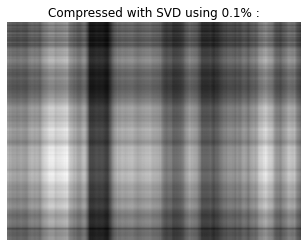

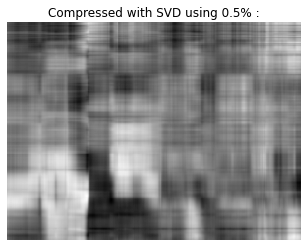

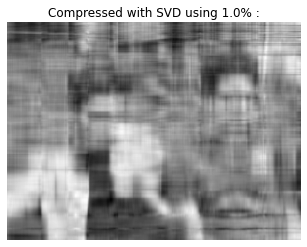

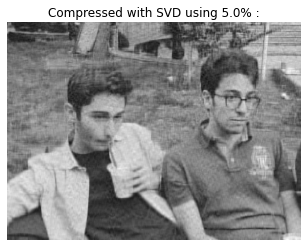

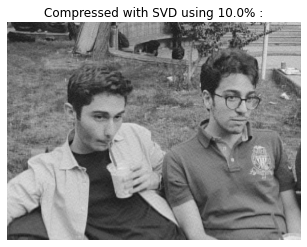




Compression using FFT: 



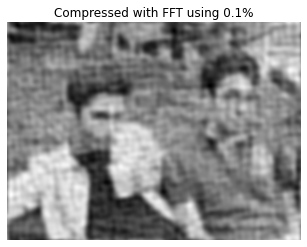

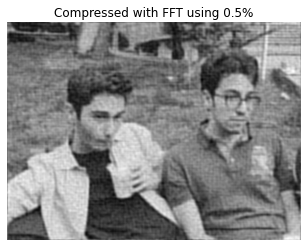

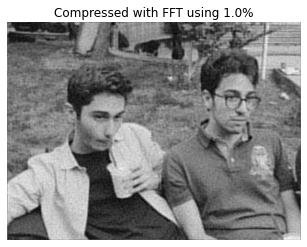

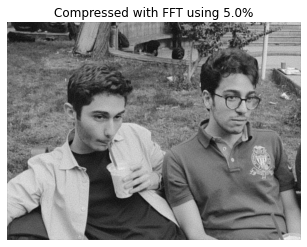

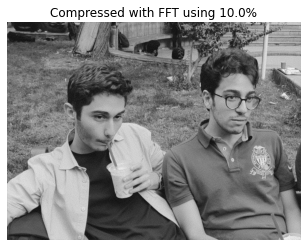

In [6]:
all_percentage = (0.001, 0.005, 0.01, 0.05, 0.1)
B = np.mean(original_image, -1)

# Compression Using SVD
print("Compression using SVD: ", end="\n")

U, S, V_T = np.linalg.svd(B, full_matrices=False)
S = np.diag(S)


def compress_image_with_SVD(U, S, V_T, percentage):
    r = int(np.round(S.shape[0] * percentage, 0))
    return U[:, :r] @ S[0:r, :r] @ V_T[:r, :]


j = 0
for percentage in all_percentage:
  plt.figure(j + 1)
  j += 1
  img = plt.imshow(compress_image_with_SVD(U, S, V_T, percentage))
  img.set_cmap("gray")
  plt.axis("off")
  plt.title("Compressed with SVD using " + str(percentage * 100) + "% :")
  plt.show()



# Compression Using FFT
print("\n\n\nCompression using FFT: ", end="\n\n")
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1)))

def compress_image_with_FF2D(keep_1):
  thresh = Btsort[int(np.floor((1 - keep_1) * len(Btsort)))]
  ind = np.abs(Bt) > thresh
  Atlow = Bt * ind
  Alow = np.fft.ifft2(Atlow).real
  return Alow

for keep in all_percentage:
  plt.figure()
  plt.imshow(compress_image_with_FF2D(keep), cmap="gray")
  plt.axis("off")
  plt.title("Compressed with FFT using " + str(keep * 100) + "%")

Which change of basis seems to do better when it comes to image compression? Briefly elaborate on what makes that change of basis more suited for images?

In general if we want to compress an image we should consider the set of basis that has most of the image's feature in it. when we perform this idea to our image we can save that picture with less memory and high quality. as we have seen in the pervious cell, FFT was better than SVD. this is because of fourier transformation. it can hold most of the image features with low amount of large fourier coefficients. so as a result fft is a good choice for image compression.

# 2. Image Denoising

Through the same process as the previous section and by empirically finding an optimal rank threshold for the SVD vectors, denoise the provided image. Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/svdd.jpg">

It is shown that SVD can be an effective denoising strategy when the underlying data is of low rank initially, but as observable from the example, raw SVD does not seem to be useful when it comes to denoising natural images.

Text(0.5, 1.0, 'Denoised with SVD: ')

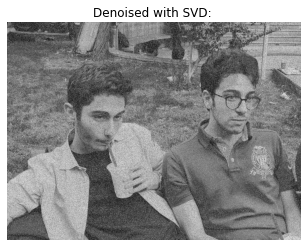

In [40]:
gray_scale = np.mean(noisy_image, -1)
U, S, V_H = np.linalg.svd(gray_scale, full_matrices=False)
new = S[S > 150]
r = new.shape[0]
S = np.diag(new)
gray_scale_denoised = U[:, :r] @ S @ V_H[:r, :]
plt.figure()
plt.imshow(gray_scale_denoised, cmap="gray")
plt.axis("off")
plt.title("Denoised with SVD: ")

The FFT is extensively used for denoising and filtering signals, as it is straightforward to isolate and manipulate particular frequency bands. It is observed that the noise is especially pronounced in high-frequency modes, therefore zero out any Fourier coefﬁcient outside of a radius containing low frequencies. You can find the approximate optimal filtering radius through trials and errors empirically. A sample denoised image is shown below:

<img style="margin: auto;" width="50%" src="./samples/fftd.jpg">

Text(0.5, 1.0, 'Denoised image with 10.0%')

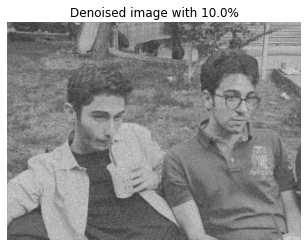

In [27]:
B = np.mean(noisy_image, -1)
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1)))
keep_1 = 0.1
thresh = Btsort[int(np.floor((1 - keep_1) * len(Btsort)))]
ind = np.abs(Bt) > thresh
Atlow = Bt * ind
Alow = np.fft.ifft2(Atlow).real
plt.figure()
plt.imshow(Alow, cmap="gray")
plt.axis("off")
plt.title("Denoised image with " + str(keep_1 * 100) + "%")